Basic tutorial to Machine Learning for complete Beginners using the Iris Dataset. 

You can learn how to implement a machine learning to a given dataset by following this notebook

Some more detailed concepts, have a look at [this notebook](https://www.kaggle.com/ash316/ml-from-scratch-part-2/notebook)

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed

# several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.   the current directory (".") and the parent directory ("..")

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "input"]).decode("utf8"))  
#The above code for linux version"ls", 

from subprocess import check_output #subprocess Module: Part of Python's standard library, check_output Function, Runs the specified command, Returns the output of the command as a byte string
print(check_output(["dir", "input"], shell=True).decode("utf8"))
# runs the command dir input in a shell , dir is the command used to list files and directories on Windows, and input is the directory you want to list
# shell=True specifies that this command should be executed in a shell, 
# result returned by check_output is a byte string, so it needs to be decoded to a UTF-8 string using .decode("utf8")
# Any results you write to the current directory are saved as output.

 Volume in drive C has no label.
 Volume Serial Number is DEF1-E162

 Directory of c:\Users\Tran Linh\Code_in_VSCode\input

07/30/2024  04:59 PM    <DIR>          .
08/06/2024  04:57 PM    <DIR>          ..
07/30/2024  04:49 PM             5,107 Iris.csv
07/30/2024  04:57 PM                 0 thu muc nay tao ra de chay code ml iris.txt
               2 File(s)          5,107 bytes
               2 Dir(s)  418,274,373,632 bytes free



In [25]:
iris = pd.read_csv("./input/Iris.csv") #load the dataset

In [26]:
iris.head(3) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [27]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


#### Removing the unneeded column

In [29]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [30]:
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Some Exploratory Data Analysis With Iris

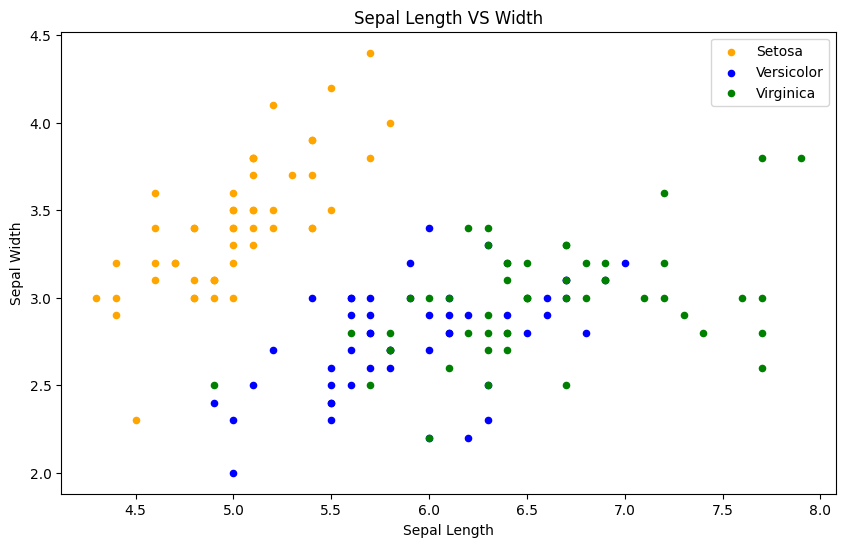

In [31]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")

fig=plt.gcf()  # gets the current figure object.
fig.set_size_inches(10,6)   #sets the figure size to 10 inches by 6 inches
plt.show()  #displays the plot

#plot showing the sepal length and sepal width for the three different species of the Iris dataset, with each species represented by a different color

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

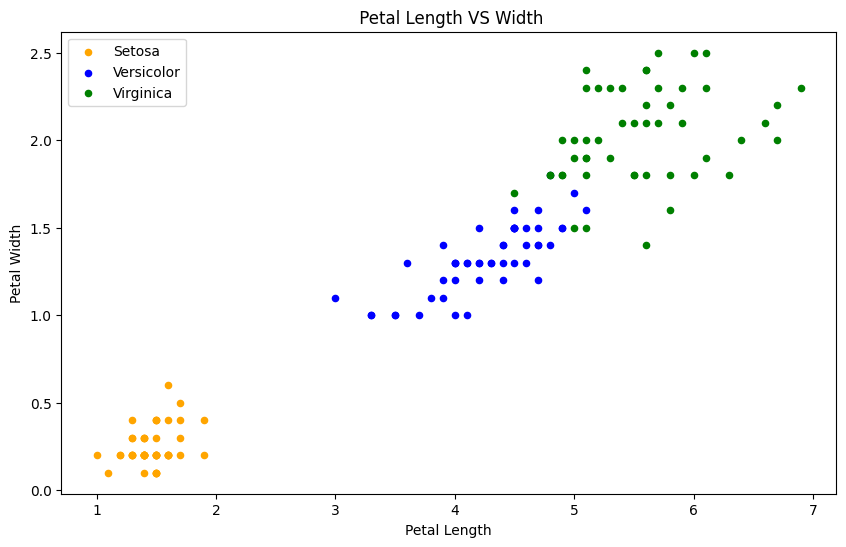

In [32]:
# filters the DataFrame iris to include only rows where the species is 'Iris-setosa', filters the DataFrame iris to include only rows where the species is 'Iris-setosa'
# creates a scatter plot with 'SepalLengthCm' on the x-axis and 'SepalWidthCm' on the y-axis
# The points are colored orange and labeled 'Setosa'
# fig holds the Axes object for further plotting
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa') 
# filters the DataFrame to include only rows where the species is 'Iris-versicolor'; 
# colored blue and labeled 'Versicolor'; adds a scatter plot to the existing Axes object (fig)
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig)

#set the x-axis label to "Sepal Length", the y-axis label to "Sepal Width", and the plot title to "Sepal Length VS Width"
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")


fig=plt.gcf() # gets the current figure object
fig.set_size_inches(10,6) # sets the figure size to 10 inches by 6 inches
plt.show() #displays the plot

### Now let us see how are the length and width are distributed

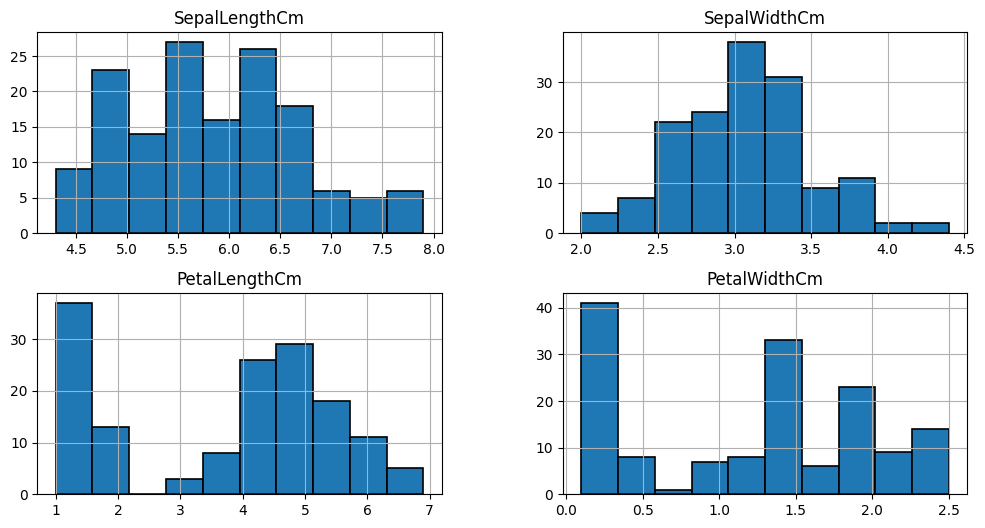

In [33]:
# Creates histograms for each numerical column in the DataFrame iris, with black edges and a line width of 1.2.
iris.hist(edgecolor='black', linewidth=1.2) # iris.hist() generates histograms for each numerical column in the DataFrame iris.
fig=plt.gcf() # Retrieves the current figure object; which contains the histograms created in the previous step. This allows you to make further modifications to the figure.
fig.set_size_inches(12,6)
plt.show()

### Now let us see how the length and width vary according to the species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

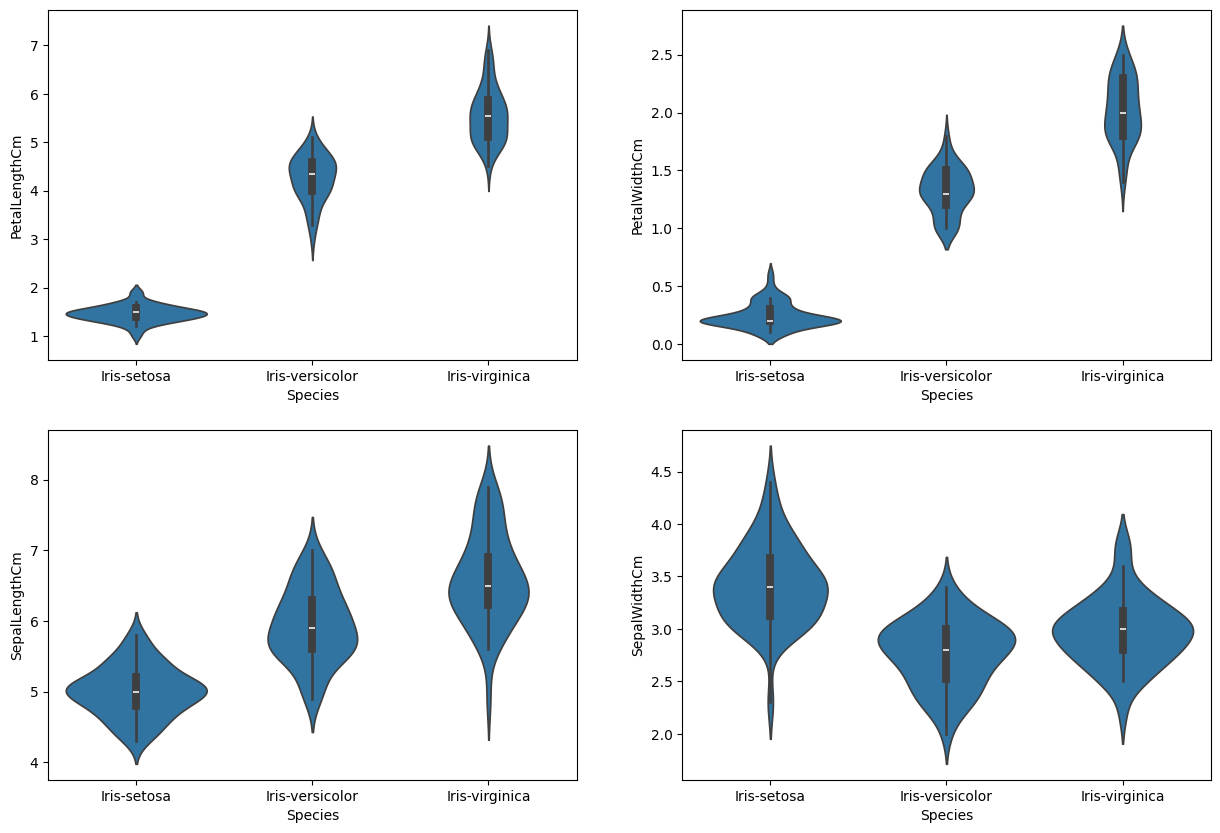

In [34]:
plt.figure(figsize=(15,10)) # Creates a new figure with a size of 15 inches by 10 inches. This sets up the canvas on which the subplots will be drawn.
plt.subplot(2,2,1) # Defines the first subplot in a 2x2 grid (2 rows and 2 columns) and places this plot in the first position.
sns.violinplot(x='Species',y='PetalLengthCm',data=iris) # Creates a violin plot of petal length for each species.
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

### The given problem : a classification problem. ---> using the classification algorithms to build a model.
**Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

**Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight. 

Before we start, we need to clear some ML notations.

**attributes**-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as **Features**.

**Target variable**, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [35]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [36]:
iris.shape #get the shape of the dataset

(150, 5)

In [37]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
X = iris.drop('Species', axis=1)  # Assuming 'species' is the column name for labels
y = iris['Species']

In [39]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [41]:
# plt.figure(figsize=(7,4)) 
# sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
# plt.show()

**Observation--->**

The Sepal Width and Length are not correlated
The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm

 1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
 2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
 3. Then pass the training dataset to the algorithm to train it. We use the **.fit()** method
 4. Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
 5. We then check the accuracy by **passing the predicted outcome and the actual output** to the model.

### Splitting The Data into Training And Testing Dataset

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [43]:
# train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [44]:
# train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
# train_y=train.Species# output of our training data
# test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
# test_y =test.Species   #output value of test data

Lets check the Train and Test Dataset

In [45]:
X_train.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4


In [46]:
X_test.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [47]:
# y_train.head()  ##output of the training data

### Support Vector Machine (SVM)

In [48]:
model = svm.SVC() #select the algorithm
model.fit(X_train,y_train) # we train the algorithm with the training data and the training output
prediction=model.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 1.0


### Decision Tree

In [50]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 1.0


### K-Nearest Neighbours

In [51]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 1.0


### Let's check the accuracy for various values of n for K-Nearest nerighbours

In [52]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

AttributeError: 'Series' object has no attribute 'append'

Above is the graph showing the accuracy for the KNN models using different values of n. 

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data 

In [ ]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [ ]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

### SVM

In [ ]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.977777777778
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.688888888889
The accuracy of the Logistic Regression using Sepals is: 0.644444444444


### Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.955555555556
The accuracy of the Decision Tree using Sepals is: 0.644444444444


### K-Nearest Neighbours

In [ ]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.977777777778
The accuracy of the KNN using Sepals is: 0.733333333333


### Observations:

 - Using Petals over Sepal for training the data gives a much better accuracy.
 - This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. 

Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that tooo.

I hope the notebook was useful to you to get started with Machine Learning.

If  find this notebook, **Please Upvote**.

Thank You!!